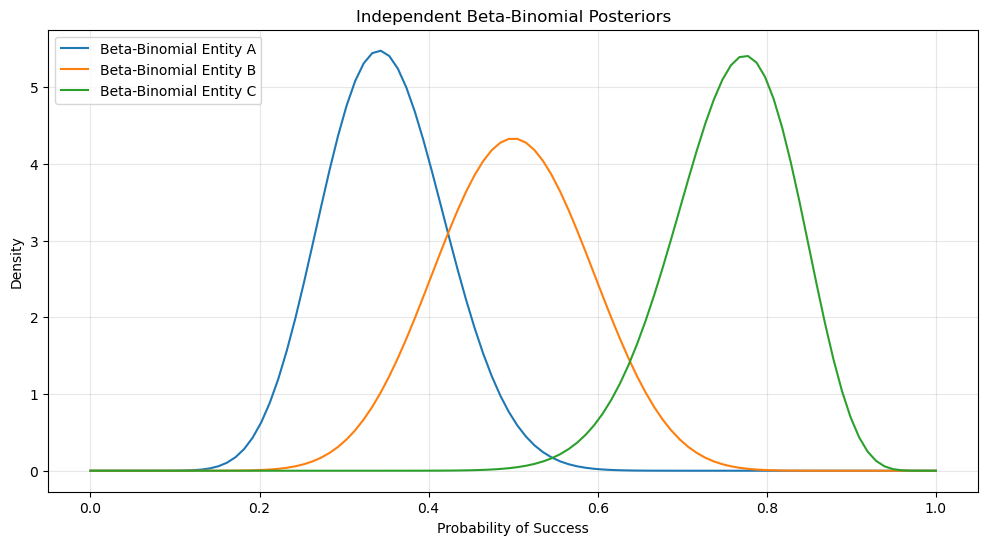

Independent Beta-Binomial Posterior Means:
Entity A: 0.35
Entity B: 0.50
Entity C: 0.76

Dirichlet-Multinomial Posterior Means (Joint):
Entity A: 0.41
Entity B: 0.28
Entity C: 0.31

# Discussion

## Analysis 1: Independent Beta-Binomial
### Overview
Each entity is analyzed independently. The Beta distribution for each entity is updated sequentially based on its observations.

### Advantages
- Simple to implement.
- Effective when entities are independent.

### Disadvantages
- Does not share information across entities, leading to inefficiencies with sparse data.

## Analysis 2: Dirichlet-Multinomial
### Overview
A single Dirichlet prior models the probabilities for all entities jointly, allowing for information pooling.

### Advantages
- Useful when entities share common traits or data is sparse.
- Improves robustness by leveraging shared information across entities.

### Disadvantages
- Computationally more complex.
- May introduce biases if entities are truly independent.

## Real-Wo

In [21]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# Simulated Data Setup
np.random.seed(42)  # For reproducibility
true_probabilities = [0.3, 0.5, 0.7]  # True success probabilities for Entity A, B, C
entities = ['Entity A', 'Entity B', 'Entity C']
n_trials = 100  # Number of trials for the simulation
observations = np.random.choice(len(entities), size=n_trials, p=[1/3, 1/3, 1/3])  # Random entity selection
outcomes = [np.random.binomial(1, true_probabilities[entity]) for entity in observations]

# Analysis 1: Independent Beta-Binomial Updates
def beta_binomial_update(entity_observations, alpha_prior, beta_prior):
    """
    Updates the Beta posterior for each entity independently.
    """
    posteriors = []
    posterior_means = []
    for i in range(len(entities)):
        alpha = alpha_prior + sum(entity_observations[i])
        beta_param = beta_prior + len(entity_observations[i]) - sum(entity_observations[i])
        posterior_means.append(alpha / (alpha + beta_param))  # Posterior mean
        posteriors.append(beta.pdf(np.linspace(0, 1, 100), alpha, beta_param))
    return posteriors, posterior_means

# Analysis 2: Joint Dirichlet-Multinomial Updates
def dirichlet_multinomial_update(entity_counts, alpha_prior):
    """
    Updates the Dirichlet posterior for all entities jointly.
    """
    alpha_posterior = np.array(alpha_prior) + np.array(entity_counts)
    posterior_mean = alpha_posterior / np.sum(alpha_posterior)  # Posterior mean
    return posterior_mean

# Data Processing for Independent Beta-Binomial
entity_observations = {i: [] for i in range(len(entities))}
for obs, outcome in zip(observations, outcomes):
    entity_observations[obs].append(outcome)

alpha_prior, beta_prior = 1, 1  # Uniform Beta prior
independent_posteriors, independent_means = beta_binomial_update(entity_observations, alpha_prior, beta_prior)

# Data Processing for Dirichlet-Multinomial
entity_counts = [len(entity_observations[i]) for i in range(len(entities))]
dirichlet_prior = [1, 1, 1]  # Uniform Dirichlet prior
dirichlet_means = dirichlet_multinomial_update(entity_counts, dirichlet_prior)

# Visualization
theta_values = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))

# Plot Beta-Binomial Posteriors
for i, entity in enumerate(entities):
    plt.plot(theta_values, independent_posteriors[i], label=f"Beta-Binomial {entity}")
plt.title("Independent Beta-Binomial Posteriors")
plt.xlabel("Probability of Success")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print Results
print("Independent Beta-Binomial Posterior Means:")
for i, entity in enumerate(entities):
    print(f"{entity}: {independent_means[i]:.2f}")

print("\nDirichlet-Multinomial Posterior Means (Joint):")
for i, entity in enumerate(entities):
    print(f"{entity}: {dirichlet_means[i]:.2f}")


discussion = """
# Discussion

## Analysis 1: Independent Beta-Binomial
### Overview
Each entity is analyzed independently. The Beta distribution for each entity is updated sequentially based on its observations.

### Advantages
- Simple to implement.
- Effective when entities are independent.

### Disadvantages
- Does not share information across entities, leading to inefficiencies with sparse data.

## Analysis 2: Dirichlet-Multinomial
### Overview
A single Dirichlet prior models the probabilities for all entities jointly, allowing for information pooling.

### Advantages
- Useful when entities share common traits or data is sparse.
- Improves robustness by leveraging shared information across entities.

### Disadvantages
- Computationally more complex.
- May introduce biases if entities are truly independent.

## Real-World Application: A/B Testing
### Scenario
An e-commerce platform is testing three promotional strategies across three customer groups (A, B, C). Each group has a binary outcome: purchase (1) or no purchase (0).

### Choosing the Right Approach
- **Independent Beta-Binomial**: Suitable if customer groups are distinct (e.g., different demographics, no interaction).
- **Dirichlet-Multinomial**: Appropriate if customer groups share similar characteristics (e.g., overlapping behaviors or interests).

### Key Insight
The Bayesian multi-armed bandit framework dynamically allocates resources by balancing:
- **Exploration**: Testing all groups to gather data.
- **Exploitation**: Focusing on the best-performing group.
"""

# Output the discussion with print() to preserve clean formatting
print(discussion)


#### 